<a href="https://colab.research.google.com/github/yash-pradhan/ImGRecogni/blob/main/x/ImgRecog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Libraries

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import keras

In [34]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [35]:
X_train, y_train

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

In [36]:
X_train.shape,y_train.shape


((60000, 28, 28), (60000,))

In [37]:
X_test.shape ,y_test.shape

((10000, 28, 28), (10000,))

In [38]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [15]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Cost","Scandal","Shirt","Sneaker","Bag","Ankle Boot"]

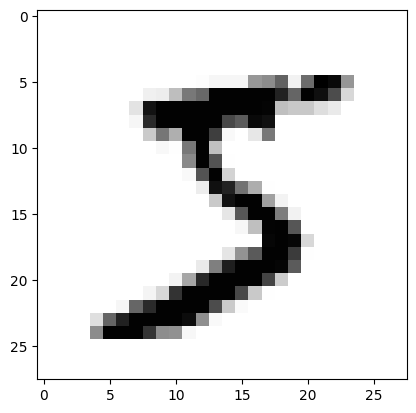

In [39]:
plt.imshow(X_train[0] , cmap = 'Greys')

TypeError: ignored

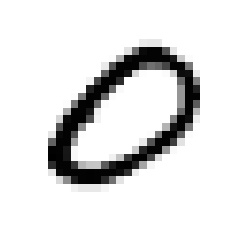

In [41]:
plt.figure(figsize=(16,16))

j=1
for i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j); j+=1
  plt.imshow(X_train[i],cmap='Greys')
  plt.axis('off')
  plt.title('{} / {}'.format(class_labels[y_train[i], y_train[i]]))



In [42]:

X_train=np.expand_dims(X_train,-1)
X_test=np.expand_dims(X_test,-1)

In [43]:
X_train.ndim
X_test.ndim

4

In [44]:
X_train=X_train/255
X_test=X_test/255

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_val,y_train, y_val=train_test_split(X_train,y_train, test_size=0.2, random_state=2020)

In [46]:
X_train.shape, y_train.shape

((48000, 28, 28, 1), (48000,))

In [47]:
X_val.shape, y_val.shape


((12000, 28, 28, 1), (12000,))

In [50]:
model=keras.models.Sequential([
                    keras.layers.Conv2D(filters=32, kernel_size=3,strides=(1,1),padding='valid', activation ='relu', input_shape=[28,28,1]),
                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                    keras.layers.Flatten(),
                    keras.layers.Dense(units=128, activation='relu'),
                    keras.layers.Dense(units=10, activation='softmax'),


])

In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

In [52]:
model.compile(optimizer='adam',loss='sparse_catagroical_crossentropy',metrics=['accuracy'])

In [1]:
model.fit(X_train, y_train, epochs=10,batch_size=512,verbose=1,validation_data=(X_val, y_val))

NameError: ignored